In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma

# Parameters for data
n = 30
m = 0  # Mean
s = 1  # Standard deviation
x = norm(loc=m, scale=s).rvs(size=n)  # Generate data

# Gibbs sampler settings
C = 2       # Number of chains
G = 100     # Number of Gibbs samples
theta = np.zeros((C, G))  # Storage for theta samples
tau = np.zeros((C, G))    # Storage for tau samples

# Initialization
theta[:, 0] = 1000  # Initial guess for theta
tau[:, 0] = 0.1     # Initial guess for tau


In [3]:
# Gibbs Sampling
for c in range(C):  # Loop over chains
    for g in range(1, G):  # Loop over samples
        # Sample theta | tau, x from a Normal distribution
        mean_theta = np.mean(x)
        var_theta = 1 / (n * tau[c, g-1])
        theta[c, g] = norm(loc=mean_theta, scale=np.sqrt(var_theta)).rvs()
        
        # Sample tau | theta, x from a Gamma distribution
        alpha_tau = n / 2
        beta_tau = np.sum((x - theta[c, g])**2) / 2
        tau[c, g] = gamma(a=alpha_tau, scale=1 / beta_tau).rvs()

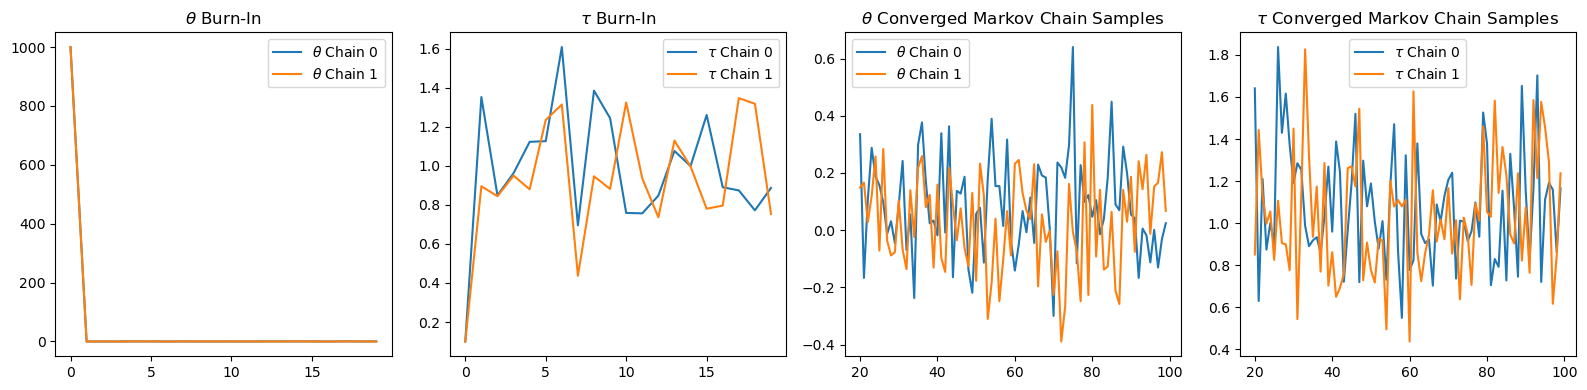

In [4]:
# Visualization
burn = 20  # Burn-in period
demo = 120  # Number of samples for the stationary phase

fig, ax = plt.subplots(1, 4, figsize=(16, 4))
ax[0].set_title("$\\theta$ Burn-In")
ax[1].set_title("$\\tau$ Burn-In")
ax[2].set_title("$\\theta$ Converged Markov Chain Samples")
ax[3].set_title("$\\tau$ Converged Markov Chain Samples")

for c in range(C):
    # Burn-in period
    ax[0].plot(theta[c, :burn], label=f"$\\theta$ Chain {c}")
    ax[1].plot(tau[c, :burn], label=f"$\\tau$ Chain {c}")
    
    # Stationary (converged) samples
    ax[2].plot(np.arange(burn, G), theta[c, burn:], label=f"$\\theta$ Chain {c}")
    ax[3].plot(np.arange(burn, G), tau[c, burn:], label=f"$\\tau$ Chain {c}")

for a in ax:
    a.legend()

plt.tight_layout()
plt.show()

In [6]:
# Calculate credible intervals for theta and tau after burn-in
theta_samples = theta[:, burn:].flatten()  # Flatten samples after burn-in
tau_samples = tau[:, burn:].flatten()

credible_level = 0.95  # 95% credible interval

# Credible interval for theta
theta_lower = np.percentile(theta_samples, (1 - credible_level) / 2 * 100)
theta_upper = np.percentile(theta_samples, (1 + credible_level) / 2 * 100)

# Credible interval for tau
tau_lower = np.percentile(tau_samples, (1 - credible_level) / 2 * 100)
tau_upper = np.percentile(tau_samples, (1 + credible_level) / 2 * 100)

print(f"Credible Interval for θ (Theta): ({theta_lower}, {theta_upper})")
print(f"Credible Interval for τ (Tau): ({tau_lower}, {tau_upper})")

Credible Interval for θ (Theta): (-0.25849188849245247, 0.3768849176755859)
Credible Interval for τ (Tau): (0.6146340802173059, 1.6412506824085207)
